# Importing libraries and data

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [289]:
df = pd.read_excel("data/lichess_games_summary.xlsx")

In [290]:
df.head(5)

,GameId,Site,Date,UTCDate,UTCTime,White,Black,WhiteElo,BlackElo,Result,...,TimeControl,ECO,Opening,Termination,NumMoves,NumTurns,WhiteCastled,BlackCastled,LastMove,MovesSAN
0,rvuBZ8lZ,https://lichess.org/rvuBZ8lZ,2024.06.29,2024.06.29,17:32:22,UdiQ,nishiv_chess,1899.0,1928.0,0-1,...,120+1,A06,Zukertort Opening: Tennison Gambit,Normal,92,46,True,False,Rxe4+,Nf3 d5 e4 dxe4 Ng5 Nc6 Nxe4 Bf5 Nbc3 e6 Qf3 Nf...
1,UHfYzLle,https://lichess.org/UHfYzLle,2024.06.29,2024.06.29,17:29:58,nishiv_chess,Rocknbol,1935.0,1848.0,0-1,...,120+1,B06,Modern Defense,Normal,54,27,False,True,Nc6,e4 g6 d4 Bg7 Be3 d6 Bd3 Nf6 Qd2 O-O Bh6 Ng4 Bx...
2,UOXnYWKB,https://lichess.org/UOXnYWKB,2024.06.29,2024.06.29,17:23:28,nishiv_chess,tmorsy123,1941.0,1907.0,0-1,...,120+1,B01,Scandinavian Defense: Mieses-Kotroc Variation,Time forfeit,106,53,True,True,Nd4,e4 d5 exd5 Qxd5 Nf3 Qe6+ Be2 Nc6 O-O h5 d4 Qg6...
3,yQkk4s62,https://lichess.org/yQkk4s62,2024.06.29,2024.06.29,17:19:10,boensaka,nishiv_chess,1894.0,1947.0,1-0,...,120+1,B20,Sicilian Defense,Normal,67,33,True,True,Rb8#,e4 c5 d3 Nc6 Nf3 e6 Be2 Nge7 c3 Ng6 Bg5 Be7 Be...
4,FlXSw9bJ,https://lichess.org/FlXSw9bJ,2024.06.29,2024.06.29,17:15:41,nishiv_chess,c4Polo,1954.0,1812.0,0-1,...,120+1,B01,Scandinavian Defense: Mieses-Kotroc Variation,Normal,63,31,True,True,Rb5,e4 d5 exd5 Qxd5 Nf3 Bg4 Be2 Nd7 O-O g6 d3 Bg7 ...


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4026 entries, 0 to 4025
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GameId        4026 non-null   object 
 1   Site          4026 non-null   object 
 2   Date          4026 non-null   object 
 3   UTCDate       4026 non-null   object 
 4   UTCTime       4026 non-null   object 
 5   White         4026 non-null   object 
 6   Black         4026 non-null   object 
 7   WhiteElo      4015 non-null   float64
 8   BlackElo      4015 non-null   float64
 9   Result        4026 non-null   object 
 10  Variant       4026 non-null   object 
 11  TimeControl   4026 non-null   object 
 12  ECO           3995 non-null   object 
 13  Opening       3995 non-null   object 
 14  Termination   4026 non-null   object 
 15  NumMoves      4026 non-null   int64  
 16  NumTurns      4026 non-null   int64  
 17  WhiteCastled  4026 non-null   bool   
 18  BlackCastled  4026 non-null 

In [292]:
df.describe()

,WhiteElo,BlackElo,NumMoves,NumTurns
count,4015.000000,4015.000000,4026.000000,4026.000000
mean,1785.593524,1802.160897,65.736711,32.624441
std,160.604605,152.451523,30.250453,15.135825
min,690.000000,666.000000,2.000000,1.000000
25%,1699.000000,1736.000000,45.000000,22.000000
50%,1828.000000,1844.000000,61.000000,30.000000
75%,1897.000000,1900.000000,82.000000,41.000000
max,2766.000000,2273.000000,282.000000,141.000000


In [293]:
df.isnull().sum()

GameId           0
Site             0
Date             0
UTCDate          0
UTCTime          0
White            0
Black            0
WhiteElo        11
BlackElo        11
Result           0
Variant          0
TimeControl      0
ECO             31
Opening         31
Termination      0
NumMoves         0
NumTurns         0
WhiteCastled     0
BlackCastled     0
LastMove         0
MovesSAN         0
dtype: int64

In [294]:
df.nunique()

GameId          4026
Site            4026
Date             272
UTCDate          272
UTCTime         3882
White           1733
Black           1515
WhiteElo         684
BlackElo         668
Result             3
Variant            8
TimeControl       99
ECO              136
Opening          342
Termination        2
NumMoves         181
NumTurns          97
WhiteCastled       2
BlackCastled       2
LastMove        1324
MovesSAN        4025
dtype: int64

In [295]:
df['Variant'].value_counts()

Variant
Standard            3935
Crazyhouse            56
Chess960              22
Atomic                 7
King of the Hill       2
Three-check            2
Horde                  1
Antichess              1
Name: count, dtype: int64

<Axes: >

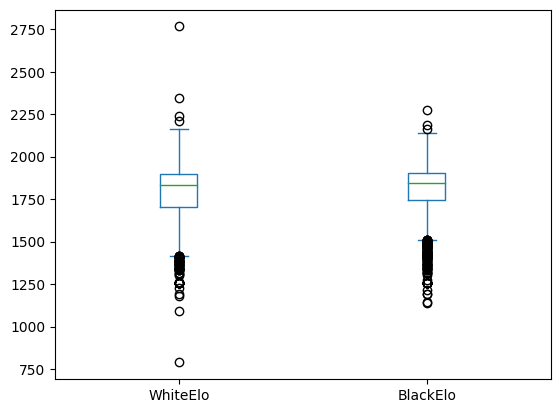

In [296]:
df[df['Variant'] == 'Standard'][['WhiteElo','BlackElo']].plot.box()

# Feature Engineering

In [297]:
df.columns

Index(['GameId', 'Site', 'Date', 'UTCDate', 'UTCTime', 'White', 'Black',
       'WhiteElo', 'BlackElo', 'Result', 'Variant', 'TimeControl', 'ECO',
       'Opening', 'Termination', 'NumMoves', 'NumTurns', 'WhiteCastled',
       'BlackCastled', 'LastMove', 'MovesSAN'],
      dtype='object')

In [298]:
df['PlayerColor'] = df['White'].apply(lambda x :"White" if x == "nishiv_chess" else "Black")

In [299]:
df['PlayerElo'] = df.apply(lambda row : row['WhiteElo'] if row['White'] == 'nishiv_chess' else row['BlackElo'],axis=1)
df['OpponentElo'] = df.apply(lambda row : row['WhiteElo'] if row['White'] != 'nishiv_chess' else row['BlackElo'],axis=1)

In [300]:
df['RatingDiff'] = df['PlayerElo'] - df['OpponentElo']

In [301]:
df['MatchResult'] = df.apply(lambda row : "Draw" if row['Result'] == '1/2-1/2' 
                             else "Win" if row['Result'] == '1-0' and row['PlayerColor'] == 'White'
                             else "Loss",axis = 1)

## Time Related Features

In [302]:
# Convert to datetime with UTC timezone
df['UTCDateTime'] = pd.to_datetime(
    df['UTCDate'] + ' ' + df['UTCTime'],
    format="%Y.%m.%d %H:%M:%S",
    errors='coerce'
).dt.tz_localize('UTC')

df['LocalDateTime'] = df['UTCDateTime'].dt.tz_convert('Asia/Kolkata')

In [303]:
df['LocalDateTime'].dtype

datetime64[ns, Asia/Kolkata]

In [304]:
df['GameDay'] = df['LocalDateTime'].dt.day
df['DayOfWeek'] = df['LocalDateTime'].dt.day_name()
df['GameHour'] =df['LocalDateTime'].dt.hour